## Μαθιουδάκης Κωνσταντίνος CSD3982
## Hard Set 2023
### PS: Needs latex installed to run locally (+Python 3.11.0) ## 
### PS: Open in google colab : https://colab.research.google.com/ ###

Installing necessary libraries:

In [34]:
%pip install matplotlib
%pip install numpy
%pip install networkx
%pip install sorting

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [35]:
# python 3.11.0
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import sorting as sort
from bisect import bisect_left

---
# Exercise 10 (+Bonus)

### a) 

## (BONUS)

When we execute DFS for each node in the graph, we are actually running the DFS algorithm $n$ times.

Since each DFS call has a time complexity of $O(n+m)$, the total time complexity for constructing the path_hash becomes $O(n*(n+m))$.

The has_path method has a constant time complexity of $O(1)$, as it checks whether a pair of nodes exists in the dictionary path_hash.


Path between C and B: False
Path between F and E: True
Path between H and A: True
Path between E and B: False
Path between H and K: True
Path between K and C: False
Path between I and H: True
Path between D and K: True


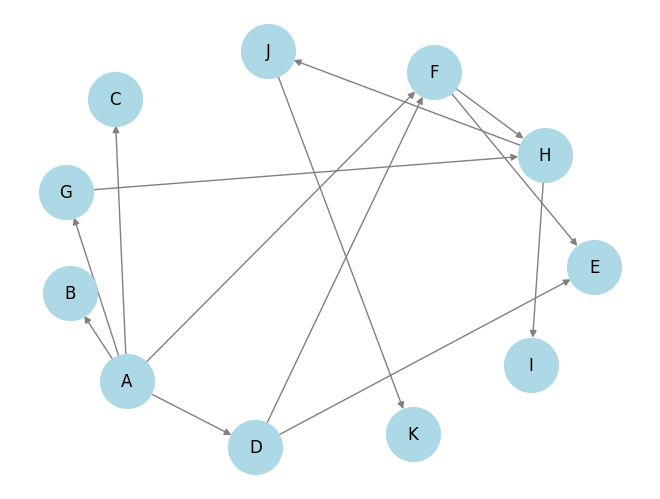

In [36]:
# Make sure to run the dependancies cells above first

class Graph:
    def __init__(self, edges):
        self.edges = edges
        self.graph = self.build_graph()
        self.path_hash = self.build_path_hash()
        #print(self.path_hash)

    def build_graph(self):
        graph = {}
        for u, v in self.edges:
            if u not in graph:
                graph[u] = []
            graph[u].append(v)
        return graph

    def build_path_hash(self):
        path_hash = {}
        for v in self.graph:
            visited = set()
            self.dfs(v, visited)
            for tmp in visited:
                if v != tmp:
                    path_hash[(v, tmp)] = True
        return path_hash

    def dfs(self, node, visited):
        visited.add(node)
        if node in self.graph:
            for neighbor in self.graph[node]:
                if neighbor not in visited:
                    self.dfs(neighbor, visited)

    def has_path(self, u, v):
        return (u, v) in self.path_hash or (v, u) in self.path_hash
    
    def check_path(self, u, v):
        result = self.has_path(u, v)
        print(f"Path between {u} and {v}: {'True' if result else 'False'}")
        
        
def plot_graph(edges):
    G = nx.DiGraph()
    G.add_edges_from(edges)
    pos = nx.spring_layout(G, k=5)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray',node_size=1500)
    plt.show()

# A Test scenario
edges = [
    ('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'F'),
    ('A', 'G'), ('D', 'E'), ('D', 'F'), ('F', 'H'),
    ('G', 'H'), ('H', 'I'), ('H', 'J'), ('J', 'K'), ('F','E')
]

graph = Graph(edges)



graph.check_path('C', 'B')  # False
graph.check_path('F', 'E')  # True
graph.check_path('H', 'A')  # True
graph.check_path('E', 'B')  # False
graph.check_path('H', 'K')  # True
graph.check_path('K', 'C')  # False
graph.check_path('I', 'H')  # True
graph.check_path('D', 'K')  # True
plot_graph(edges)


### b)

We will perform a BFS on the graph to create a hash_table that contains the nodes by layer. This process is called Layering.

When we want to check if there is a path between two nodes, we look up in the hash_table at a cost of $O(1)$.

If it returns False, it doesn't necessarily mean that they are not connected; it just means they are not on the same layer, so we run a DFS to definitively find out if there is a path.

The DFS has a cost of $O(m+n)$.

If the DFS also returns False, then there is no path, of course.

If the graph is not connected, then multiple BFSs will be needed, and the DFS will need to be run with various starting vertices.

If the graph contains cycles, then the nodes in each BFS layer will not necessarily be accessible to each other.

**Algorithm:**

**Input**: A graph G and two nodes u, v of G

**Output**: True if the nodes u, v are connected, False if they are not

1) Run Breadth First Search on G and save in a hash table named `layers_hash` the nodes per layer. (Layering)

2)  - If u, v in `layers_hash` return True 
    - else if ( DFS(u, v) OR DFS(v, u) ) return True
    - else return False


### c)
We can use the same algorithm that I wrote in the previous question but change the data structure we use.

Instead of a hash table, we can use:
 - a list by constructing something like an adjacency list
 - an array by constructing something like an adjacency matrix

Construction Cost:
 - list: $O(n)$
 - matrix: $O(n^2)$

DFS Cost and, by extension, the cost when asking for a response about a pair of nodes:
 - list: $O(m+n)$
 - matrix: $O(n^2)$

Compared to the hash we previously used, both new implementations underperform when asking for a response from the structure.

However, where the list, for example, gains an advantage is in the creation of the structure.

Also, compared to the matrix, the list wins in terms of space complexity.

Therefore, in these two implementations that use different structures, there is a tradeoff between construction and the time it takes to respond about a pair of nodes.


---
# Exercise 1
I will create 3 arrays to solve the 3SUM problem:

a) at O($n^3$)

b) at O($(n^2)\log n$)

c) at O($n^2$)

Is there an algorithm with a complexity better than O($n^2$)?

- Yes, according to Wikipedia: https://en.wikipedia.org/wiki/3SUM
  the fastest algorithm that solves the 3SUM problem does so in: $$O\left(\frac{n^2\log(\log n)}{\log^2n}\right)$$


In [37]:
# Create thre arrays which will represent the vectors
A = np.array([4,8,12])
B = np.array([6,-10,14])
C = np.array([18,10,-2])
print(A)
print(B)
print(C)

[ 4  8 12]
[  6 -10  14]
[18 10 -2]


### a) O($n^3$)

In [38]:
def three_sum_a(ar1,ar2,ar3):
    for i in range(ar1.size):
        for j in range(ar2.size):
            for k in range(ar3.size):
                if (ar1[i]+ar2[j]+ar3[k]==0):
                    return True
    return False

result = three_sum_a(A,B,C)
print(result)


True


### b) O($(n^2)\log n$)

In [39]:
# bisect is a python library for performing binary search O(logn)
def binary_search(array, value):
    index = bisect_left(array, value)
    if index != len(array) and array[index] == value:
        return True
    else:
        return False

def three_sum_b(A, B, C):
    C.sort()
    # O(N^2*(logn))
    for a in A:
        for b in B:
            if binary_search(C, -(a + b)):
                return True
    return False

result = three_sum_b(A,B,C)
print(result)

True


### c) O($n^2$)

In [40]:
# Dictionaries in python are implemented as hash tables 
def three_sum_c(A, B, C):
    AB_sums = {} 
    for a in A:
        for b in B:
            if a + b in AB_sums:
                AB_sums[a + b] += 1
            else:
                AB_sums[a + b] = 1

    for c in C:
        if -c in AB_sums: # Since this is hash table this costs O(1)
            return True
    return False

result = three_sum_c(A,B,C)
print(result)

True


---
# Exercise 2

### a)
In the following graph example, the `heaviest first greedy algorithm` will choose the node numbered 10 and then terminate.

However, this is not the optimal solution, as two additional nodes could have been chosen, which are independent of each other and have a total weight_sum=11.


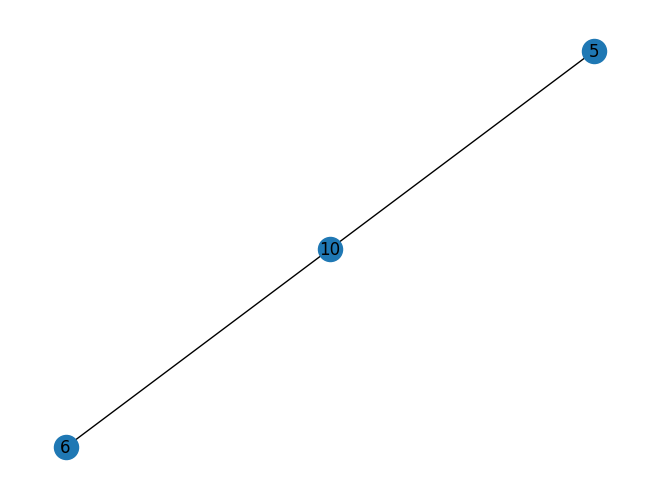

In [41]:
# Draw the graph using mpl and nx
G = nx.Graph()
G.add_node(6)
G.add_node(10)
G.add_node(5)
G.add_edge(6, 10)
G.add_edge(10, 5)
nx.draw(G, with_labels=True)
plt.show()

### b)

In the following graph example, the algorithm will not yield the desired result:

Instead, the result it will give is:

S1 = {9,2}

S2 = {4,12}

Weight(S2) > Weight(S1) : S2 will get returned

But the heaviest set is {9,12} and not {4,12}


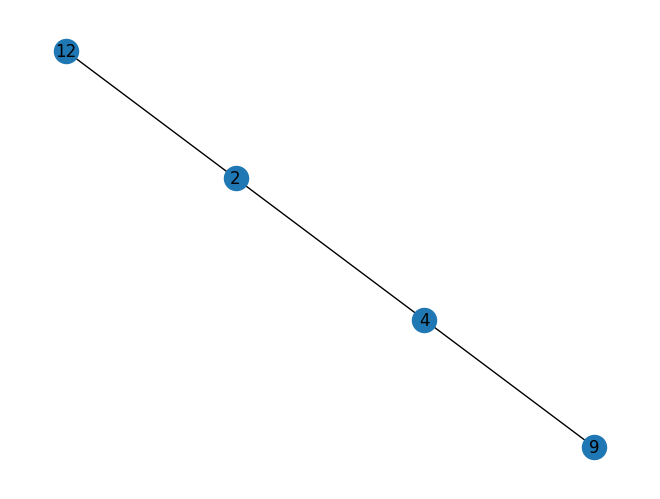

In [42]:
# Draw the graph using mpl and nx
G = nx.Graph()
G.add_node(12)
G.add_node(2)
G.add_node(4)
G.add_node(9)
G.add_edge(12,2)
G.add_edge(2,4)
G.add_edge(4,9)
nx.draw(G, with_labels=True)
plt.show()

### C)

The initialization of the array takes $O(n)$.

The for loop runs n-2 times, so it has a cost of $O(n)$.

The while loop also has a cost of $O(n/2)=O(n)$.

The list comprehensions run n/2 times, so their cost is: $Ο(n)$.

Therefore, the complexity of the following algorithm is: $O(5*N)=O(N)$

In [43]:
def find_max_weight_independent_set(weights):
    n = len(weights)  
    max_weights = [0] * (n+1)  
    max_weights[1] = weights[0]  
    max_weights[2] = max(weights[0], weights[1]) 
    
    # I have allready filled the max_weight[1],[2] so they are not None and we can calculate the max below
    for i in range(3, n+1):
        max_weights[i] = max(max_weights[i-1], max_weights[i-2] + weights[i-1])

    max_weight_nodes = []  
    i = n  
    
    while i >= 1:
        if max_weights[i-1] >= max_weights[i-2] + weights[i-1]:
            i -= 1
        else:
            max_weight_nodes.append(i)  
            i -= 2

    max_weight_nodes = [node - 1 for node in max_weight_nodes]
    independent_set = [weights[node] for node in max_weight_nodes]

    return independent_set  


weights = [11, 41, 12, 5, 20, 50, 60, 9, 12]
print(find_max_weight_independent_set(weights))


[12, 60, 20, 41]


---
# Exercise 3

The pseudocode was found at the following link:

https://www.cs.toronto.edu/~jepson/csc373/tutNotes/cellTower.pdf

Complexity: 
 - Sorting costs $n \log n$
 - The for loop costs $n$
 
Therefore, the total complexity is $ Θ(n \log n) $


In [44]:
def cell_tower_locations(houses, R):
    houses = sorted(list(set(houses)))
    n = len(houses)

    if n == 0:
        return []

    towers = []
    t1 = houses[0] + R
    towers.append(t1)
    p = 1

    for k in range(1, n):
        if abs(houses[k] - towers[p-1]) > R:
            p += 1
            t_p = houses[k] + R
            towers.append(t_p)

    return towers

# Test with range = 1
houses = [1, 2, 3, 4, 5, 6, 7]
R = 1
print("Example with R=1")
print(cell_tower_locations(houses, R))

# Test with range = 4
print("Example with R=4")
houses = [1, 3, 7, 11, 15, 19, 23]
R = 4

print(cell_tower_locations(houses, R))

Example with R=1
[2, 5, 8]
Example with R=4
[5, 15, 27]


---
# Exercise 4

### a)
Assuming that each number corresponding to a node in the graph is unique, then the algorithm always returns a local minimum. 

Since each number is unique, there is always a node that has a lower weight than all the others, and this node is definitely a local minimum.

When the algorithm exits the while loop, all neighbors of node v will have a value greater than the value of v, and thus the node v returned to us will always be a local minimum in the graph G.
However, the while loop always terminates because, as I proved above, there will always be at least one local minimum if the numbers/values of the nodes are unique, and in each iteration of the while loop, we always go to a node with a smaller number. Since the graph does not have an infinite number of nodes and the number of nodes is finite, the while loop will not continue to run forever and will eventually terminate and return the v.

In the worst case, the algorithm will need to make comparisons with all the values of the nodes.

The grid is of size n x n, so the total number of nodes in the grid is $n^2$.
Each comparison costs Θ(1).

Therefore, the complexity of the given algorithm is: $T(n)=Θ(n^2)$.


### b)
A divide and conquer algorithm that always returns a local minimum:
1. Initialize variables: candidate_min = +∞, middle_min = +∞.
2. Traverse the middle column and middle row of the graph, finding the minimum node in these and store it as middle_min.
   Then, look at its neighbors. Store as candidate_min the smallest value of the neighbors.
3. Compare middle_min with candidate_min.
   If candidate_min < middle_min, repeat the process recursively in the quadrant of the graph where the node with value = candidate_min exists.

   - If not, then check if the node with middle_min (which is the minimum of the middle column and middle row) is a local minimum:
   
      - If it is, then return it.
   
      - If not, then look at its neighbors, find the one with the smallest value, and repeat the entire process recursively in that quadrant.

Since in each recursive call, $n' = n/2$, the algorithm has a complexity of: 

\begin{align*}
2n + 2n/2 + 2n/4 + \dots &= \sum_{k=0}^{n-1} \frac{2n}{2^k}
\end{align*}

Therefore, the complexity of the algorithm is: $O(N)$

I also include a diagram with an example (purple= middle column, blue= the neighbors of the middle column):

![](./4B_sxima.PNG)


---
# Exercise 5 

The Modified FTT Algorithm:

Algorithm FFT(a,$\omega$):

Input: An n-length coefficient vector $a = [a_0, a_1,\dots,a_{n-1}]$ and a primitive nth root of unity $\omega$, where $n$ is a power of $3$

Output: A vector $y$ of values of the polynomial for $a$ at the nth roots of unity

if $n=1$ {

&nbsp;&nbsp;&nbsp;&nbsp;return $y=a$

}

$x\leftarrow\omega^0$ # $x$ will store powers of $\omega$, so initially $x=1$

// Divide step, which separates the input vector into three sub-vectors

$a_{\mathrm{first}}\leftarrow[a_0,a_3,a_6,\dots,a_{n-3}]$

$a_{\mathrm{second}}\leftarrow[a_1,a_4,a_7,\dots,a_{n-2}]$

$a_{\mathrm{third}}\leftarrow[a_2,a_5,a_8,\dots,a_{n-1}]$

$y_{\mathrm{first}}\leftarrow\mathrm{FFT}(a_{\mathrm{first}},\omega^3)$

$y_{\mathrm{second}}\leftarrow\mathrm{FFT}(a_{\mathrm{second}},\omega^3)$

$y_{\mathrm{third}}\leftarrow\mathrm{FFT}(a_{\mathrm{third}},\omega^3)$

// Combine step, using $x = \omega^i$

for $i\leftarrow0$ to $n/3-1$ {

&nbsp;&nbsp;&nbsp;&nbsp;$y_i\leftarrow y_{\mathrm{first},i}+x\cdot y_{\mathrm{second},i}+x^2\cdot y_{\mathrm{third},i}$

&nbsp;&nbsp;&nbsp;&nbsp;$y_{i+n/3}\leftarrow y_{\mathrm{first},i}+\omega^{n/3}\cdot x\cdot y_{\mathrm{second},i}+\omega^{2n/3}\cdot x^2\cdot y_{\mathrm{third},i}$

&nbsp;&nbsp;&nbsp;&nbsp;$y_{i+2n/3}\leftarrow y_{\mathrm{first},i}+\omega^{2n/3}\cdot x\cdot y_{\mathrm{second},i}+\omega^{4n/3}\cdot x^2\cdot y_{\mathrm{third},i}$

&nbsp;&nbsp;&nbsp;&nbsp;$x\leftarrow x\cdot\omega$

}

return $y$

Given the recursive relation of the running time of the FFT algorithm with the modifications I made:

$T(n) = 3T\left(\frac{n}{3}\right) + O(n)$

We apply the Master Theorem:

a = 3, b = 3, and c = 1.

Since $a = b^c$, we are in the 2nd case of the Master Theorem:

$T(n) = O(n^c \log n) = O(n \log n)$

**Therefore, the complexity of the modified FFT algorithm is: $O(n \log n)$.**


---
# Exercise 6

Pseudocode:
**Algorithm: Shortest Path Counter**

**Input:** Undirected graph $G = (V, E)$, start vertex $v$, end vertex $u$

**Output:** Count of shortest paths from $v$ to $u$

1. Initialize a dictionary `distance` with all vertices as keys and $\infty$ as values
2. Initialize a dictionary `path_count` with all vertices as keys and 0 as values
3. Set `distance[v]` to 0 and `path_count[v]` to 1
4. Initialize a queue with $v$
5. While queue is not empty:
   - Remove the first vertex from the queue, call it `current_vertex`
   - For each `neighbor` of `current_vertex` in $G$:
     - If `distance[neighbor]` is $\infty$:
       - Set `distance[neighbor]` to `distance[current_vertex] + 1`
       - Set `path_count[neighbor]` to `path_count[current_vertex]`
       - Add `neighbor` to the end of the queue
     - Else if `distance[neighbor]` is `distance[current_vertex] + 1`:
       - Add `path_count[current_vertex]` to `path_count[neighbor]`
6. Return `path_count[u]`


Complexity Analysis:

The algorithm is a modified BFS. The time complexity of BFS is: $O(|V| + |E|)$.

Specifically:

- Initializing `distance` and `path_count` dictionaries is done in $O(|V|)$ time.
- The BFS takes $O(|V| + |E|)$ time.
- The while loop traverses all nodes in the worst case, and in each iteration, it may update the neighbor of the node. Therefore, the while loop takes $O(|V| + |E|)$ time.

Therefore, the total complexity of the Shortest Path Counter algorithm is: $O(|V| + |E|)$.

A Python implementation follows:


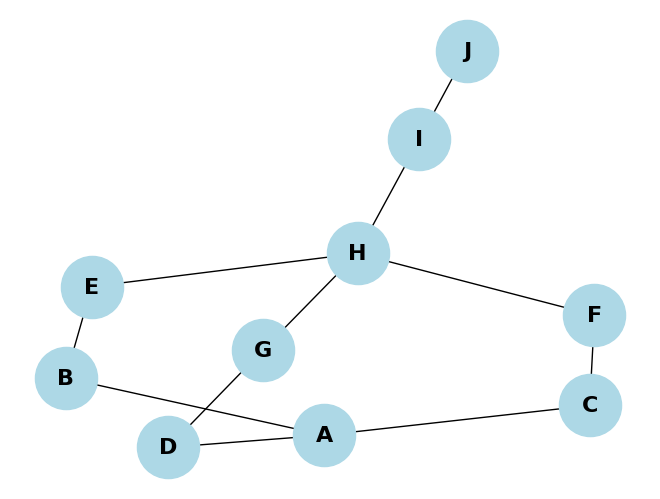

Number of shortest paths between J and A: 3


In [45]:
from collections import defaultdict

def count_shortest_paths(G, v, u):
    # Initialize variables for distance and path counter
    distance = {vertex: float('inf') for vertex in G}
    path_count = {vertex: 0 for vertex in G}
    distance[v] = 0
    path_count[v] = 1
    queue = [v]

    while queue:
        current_vertex = queue.pop(0)
        for neighbor in G[current_vertex]:
            # Update distance and path_count if the neighbor is not visited
            if distance[neighbor] == float('inf'):
                distance[neighbor] = distance[current_vertex] + 1
                path_count[neighbor] = path_count[current_vertex]
                queue.append(neighbor)
            # Update path_count if the shortest path is found
            elif distance[neighbor] == distance[current_vertex] + 1:
                path_count[neighbor] += path_count[current_vertex]

    return path_count[u]


def create_and_plot_graph(G):
    graph = nx.Graph(G)
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=16, font_weight='bold')
    plt.show()
    
    
# An example test scenario
if __name__ == "__main__":
    G = {
        'A': ['B', 'C', 'D'],
        'B': ['A', 'E'],
        'C': ['A', 'F'],
        'D': ['A', 'G'],
        'E': ['B', 'H', ],
        'F': ['C', 'H'],
        'G': ['D', 'H'],
        'H': ['E', 'F', 'G', 'I'],
        'I': ['H', 'J'],
        'J': ['I']
    }
    v = 'A'
    u = 'J'
    create_and_plot_graph(G)

    print(f'Number of shortest paths between {u} and {v}:', count_shortest_paths(G, v, u))


---
# Exercise 7

At the source: http://users.eecs.northwestern.edu/~dda902/336/hw6-sol.pdf, Kruskal's algorithm is used, but I use Boruvka's algorithm as it is shorter and the complexity is the same.

Initially, I mark the nodes that I want to be leaves and run Boruvka on all unmarked nodes.

After I have the MST returned by Boruvka, I take each leaf separately and connect it with the smallest outgoing edge to the MST, ensuring that the node with which it is connected is not also a leaf/marked.


**Algorithm: Lightest Connecting Tree with Specific Leaves**

**Input:** Undirected graph G = (V, E), edge weights $w_e$, subset U ⊆ V

**Output:** Lightest spanning tree with vertices of set U as leaves if it exists

1. Mark vertices in U as leaves

2. Construct graph $G' = (V', E')$:

    a. $V' = V - U$

    b. $E' = \{(u, v) : u, v \in V' \land (u, v) \in E\}$

3. Run Boruvka's algorithm on unmarked vertices in $G'$ to obtain MST

4. If MST does not exist:

    a. Lightest spanning tree is infeasible

5. Construct edge set $E''$:

    a. $\forall (u, v) \in E'': u \in U \land v \notin U$

6. For each vertex u in U:
    a. makeset(u)

7. Sort the edges $E''$ by $w_e$

8. For all edges u,v ∈ E'', in increasing order of weight:

    a. If find(u) ≠ find(v):

    -  Add edge u,v to MST
        
    -  Union(u,v)
        
9. Return MST


Complexity Analysis: Apart from constructing the edge set $E''$, the remaining complexity is similar to Boruvka's algorithm, which runs in time $O(|E| \log |V|)$.

We construct a set U. For each edge e = (u, v), if $find(u) \neq find(v)$, then we keep this edge in $E''$.

Therefore, this takes time $O(|E| \log |U|)$.

Thus, the total complexity of the algorithm remains bounded by $O(|E| \log |V|)$.

---
# Exercise 8

Pseudocode:

**Algorithm: Invite Guests**

**Input:** A list of `people` and a list of `pairs` of people who know each other

**Output:** A list of guests who know at least 5 people and are do not know at least 5 people

1. Initialize an empty list `Guests`
2. Initialize a zero array `KnownPeopleCounter` of size equal to the number of `people`
3. For each `person` in `people` (enumerate their index as `i`):
   - For each `pair` in `pairs`:
     - If `person` is in `pair`, increment `KnownPeopleCounter[i]` by 1
4. For each person's index `i` in the range of the number of `people`:
   - If `KnownPeopleCounter[i]` is greater than or equal to 5 and the total number of `people` minus `KnownPeopleCounter[i]` is greater than or equal to 5:
     - Append `people[i]` to `Guests`
5. Return `Guests`

And i wrote the implementation in python too to make sure it works as it should:

In [46]:
def invite_guests(people, pairs):
    Guests = []
    KnownPeopleCounter = np.zeros(len(people))
    for i, person in enumerate(people):
        for pair in pairs:
            if person in pair:
                KnownPeopleCounter[i] += 1   
    for i in range(len(people)):
        if KnownPeopleCounter[i] >= 5 and (len(people) - KnownPeopleCounter[i]) >= 5:
            Guests.append(people[i])
    return Guests

# Some Test scenario
people = ['A', 'B', 'C', 'D', 'E', 'F', 'G',
          'H', 'I', 'J', 'K', 'L', 'M', 'N']
# Should not include A to guest since he is known by all except 3 people
pairs = [('A', 'B'), ('A', 'C'), ('A', 'D'), 
         ('A', 'E'), ('A', 'F'), ('B', 'C'), 
         ('B', 'D'), ('B', 'E'), ('B', 'F'), 
         ('C', 'D'), ('C', 'E'), ('C', 'F'), 
         ('D', 'E'), ('D', 'F'), ('E', 'F'), 
         ('G', 'H'), ('G', 'I'), ('G', 'J'), 
         ('H', 'I'), ('H', 'J'), ('I', 'J'), 
         ('K', 'L'), ('K', 'M'), ('K', 'N'), 
         ('L', 'M'), ('L', 'N'), ('M', 'N'),
         ('A', 'I'), ('A', 'J'), ('A', 'K'),
         ('A','J'),('A','G'),('A','H')]

guests = invite_guests(people, pairs)
print(f'Guests to invite:\n', guests)


Guests to invite:
 ['B', 'C', 'D', 'E', 'F', 'J']


**Complexity Analysis:**

If n and m are the number of individuals and pairs respectively, then:
 - KnownPeopleCounter initialization takes O(n)
 - The double for loop takes O(n*m)
 - The final loop to create the guest list takes O(n)

Therefore, the complexity of the above algorithm is: $Ο(n*m)$


---
# Exercise 9

### a)
Create two directed acyclic graphs (DAGs) with 8 nodes each:

1. A DAG where no pair of nodes is incomparable. This graph is characterized by a linear hierarchy of nodes, with arrows pointing from one node to the next, forming a single straight line.
2. A DAG that includes at least one pair of incomparable nodes. In this graph, nodes are connected in various directions, with some nodes not being directly connected to each other, thereby creating incomparable pairs. The arrows in this graph indicate the direction of connections.


#### Acyclic graph with 8 nodes that has no pair non-comparable of nodes

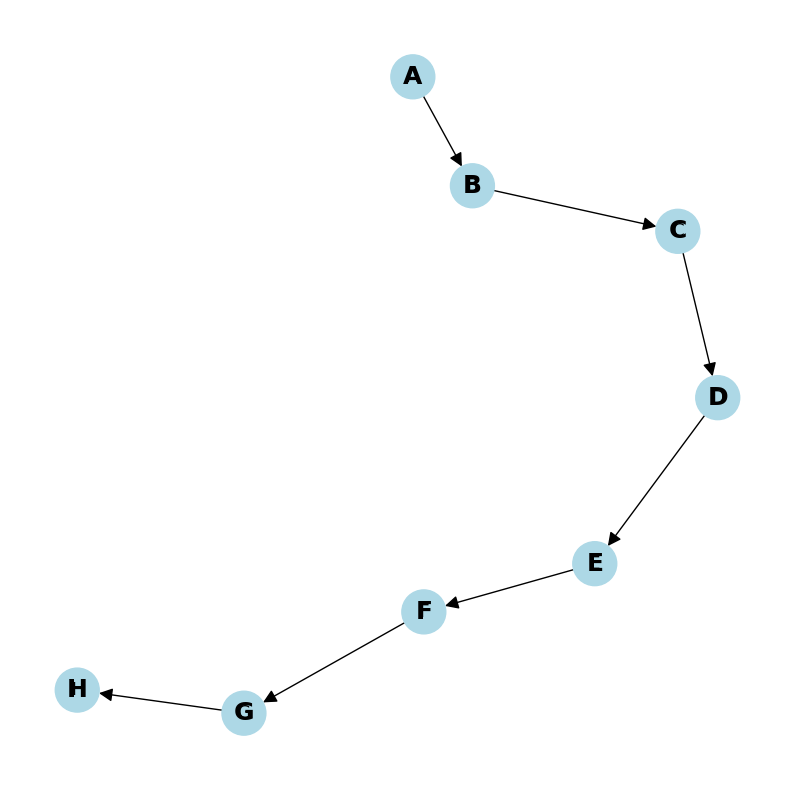

In [47]:

G2 = nx.DiGraph()
G2.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])
G2.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E'), ('E', 'F'), ('F', 'G'), ('G', 'H')])
node_attributes = {'A': {'color': 'lightblue', 'font_weight': 'bold'},
                   'B': {'color': 'lightblue', 'font_weight': 'bold'},
                   'C': {'color': 'lightblue', 'font_weight': 'bold'},
                   'D': {'color': 'lightblue', 'font_weight': 'bold'},
                   'E': {'color': 'lightblue', 'font_weight': 'bold'},
                   'F': {'color': 'lightblue', 'font_weight': 'bold'},
                   'G': {'color': 'lightblue', 'font_weight': 'bold'},
                   'H': {'color': 'lightblue', 'font_weight': 'bold'}}

# draw the graph
pos2 = nx.spring_layout(G2, seed=42)
nx.draw_networkx(G2, pos2, node_color=[node_attributes[node]['color'] for node in G2.nodes()], node_size=1000, arrowsize=20)
nx.draw_networkx_labels(G2, pos2, font_weight='bold', font_size=18)
plt.axis('off')
plt.gcf().set_size_inches(10, 10)
plt.show()


#### Acyclic graph wit 8 nodes that has at least one pair of non-comparable nodes

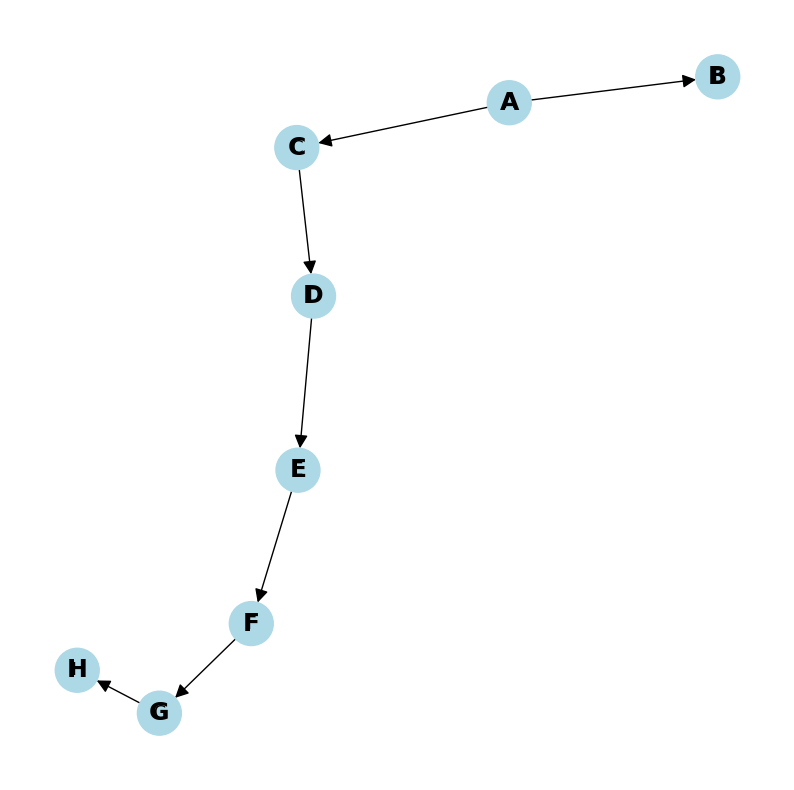

In [48]:

G2 = nx.DiGraph()
G2.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])
G2.add_edges_from([('A', 'C'), ('A', 'B'), ('C', 'D'), ('D', 'E'), ('E', 'F'), ('F', 'G'), ('G', 'H')])
node_attributes = {'A': {'color': 'lightblue', 'font_weight': 'bold'},
                   'B': {'color': 'lightblue', 'font_weight': 'bold'},
                   'C': {'color': 'lightblue', 'font_weight': 'bold'},
                   'D': {'color': 'lightblue', 'font_weight': 'bold'},
                   'E': {'color': 'lightblue', 'font_weight': 'bold'},
                   'F': {'color': 'lightblue', 'font_weight': 'bold'},
                   'G': {'color': 'lightblue', 'font_weight': 'bold'},
                   'H': {'color': 'lightblue', 'font_weight': 'bold'}}

# draw the graph
pos2 = nx.spring_layout(G2, seed=42)
nx.draw_networkx(G2, pos2, node_color=[node_attributes[node]['color'] for node in G2.nodes()], node_size=1000, arrowsize=20)
nx.draw_networkx_labels(G2, pos2, font_weight='bold', font_size=18)
plt.axis('off')
plt.gcf().set_size_inches(10, 10)
plt.show()


### b) 
The algorithm begins by performing a topological sort on the graph.

We can perform a topological sort because the graph is acyclic, and topological sorting takes linear time.

After that, we check the returned topological order for elements in pairs to see if they are connected by edges in the graph.

If they are not, then we have found a pair of non-comparable nodes and return `True`, otherwise `False`.

**Algorithm**: Find Non-Comparable Nodes in a DAG

**Input**: Directed Acyclic Graph $G = (V, E)$

**Output**: True if there are non-comparable nodes, false otherwise

1. Perform a topological sort on graph $G$ and store the result in topo_order

2. For $i$ in range  (0, len(topo_order) - 2):

    a. Let $v$ be topo_order[i] and $u$ be topo_order[i+1]

    b. If there is no edge from $v$ to $u$ and no edge from $u$ to $v$:

        - Return `True`

3. Return `False`

Sources: 

https://cs.stackexchange.com/questions/160031/linear-algorithm-to-decide-whether-a-dag-contains-at-least-one-incomparable-pair

https://www.youtube.com/watch?v=eL-KzMXSXXI

https://en.wikipedia.org/wiki/Topological_sorting#:~:text=In%20computer%20science%2C%20a%20topological,before%20v%20in%20the%20ordering


### c)

If the graph contains cycles, topological sort cannot be performed on it because it only works with DAGs.

Since the directed graph contains cycles, we first need to condense it into Strongly Connected Components (SCCs).

An SCC of a directed graph is a subgraph in which there is a path from each node to every other node in the SCC.

Therefore, if a directed graph has cycles, it will have SCCs with more than one node.

When we condense the graph, each SCC becomes a single node in the condensed graph.

In other words, this process "removes" the cycles from the graph, and we now have a DAG.

For the condensation of the graph, the following algorithms are available:

 - Tarjan's Strongly Connected Components Algorithm $O(|V|+|E|)$

 - Kosaraju's Algorithm $O(V+E)$

**Algorithm**: Find Non-Comparable Nodes in a Digraph that may contain cycles

**Input**: Directed Graph $G = (V, E)$

**Output**: True if there are non-comparable nodes, false otherwise

1. Compute the condensation of G, resulting in a DAG `G_condensed`

2. Perform a topological sort on graph `G_condensed` and store the result in topo_order

3. For $i$ in range  (0, len(topo_order) - 2):

    a. Let $v$ be topo_order[i] and $u$ be topo_order[i+1]

    b. If there is no edge from $v$ to $u$ and no edge from $u$ to $v$:

        - Return `True`

4. Return `False`

Therefore, the complexity of the above algorithm is: 

$O(V+E)$ (from the condensation) + $O(V)$ (from the topological sort) = $Ο(V)$, 

where V = number of vertices

**Python**:

In Python, the `networkx` library contains the `topological sort` method. (linear time)

In Python, the `networkx` library has the `condensation` method, which uses Kosaraju's algorithm. (linear time)

I present a Python implementation using these to achieve linear execution time.

I will provide five input scenarios:
 - A DAG where all nodes are comparable (for question b)
 - A DAG where there are non-comparable nodes (for question b)
 - A Digraph with cycles where all are comparable (for question c)
 - A Digraph with cycles where there are non-comparable nodes (for question c)

In the DAGs, I also print the topological ordering.


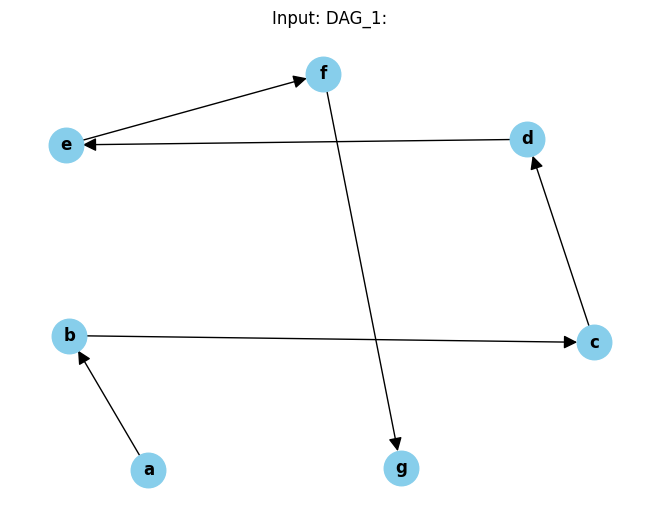

a b c d e f g
Output:
Non-comparable nodes: False


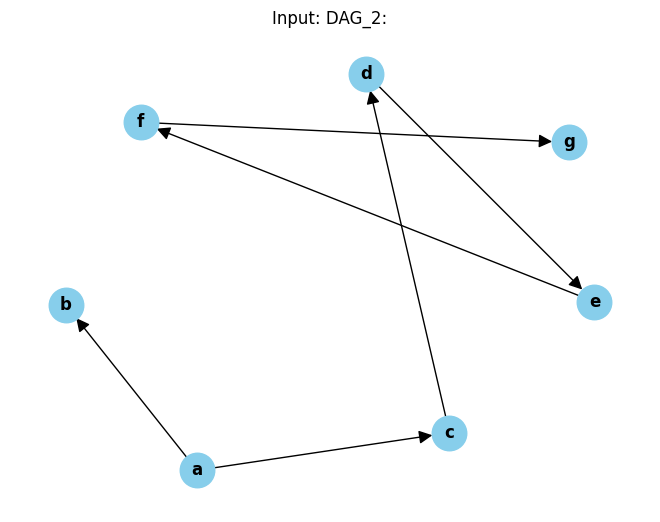

a b c d e f g
Output:
Non-comparable nodes: True


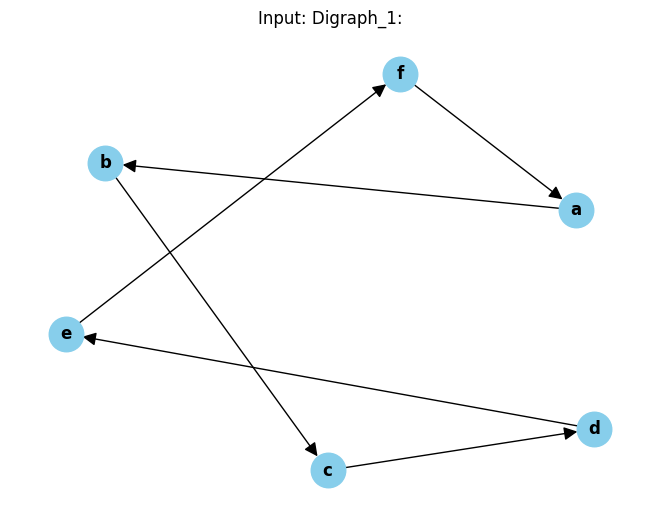

Output:
Non-comparable nodes: False


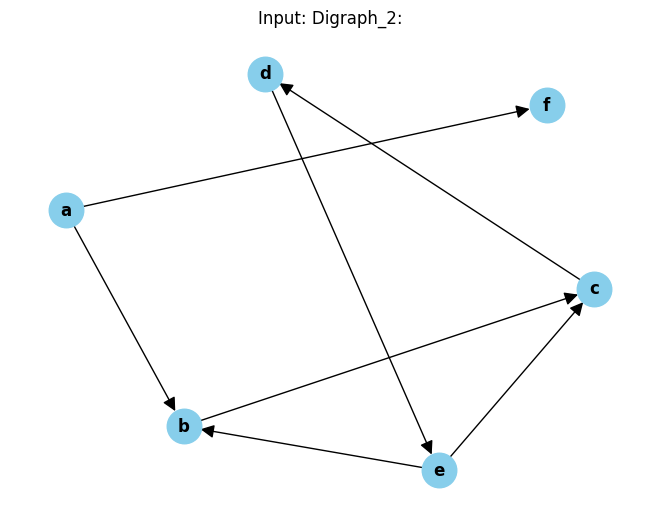

Output:
Non-comparable nodes: True


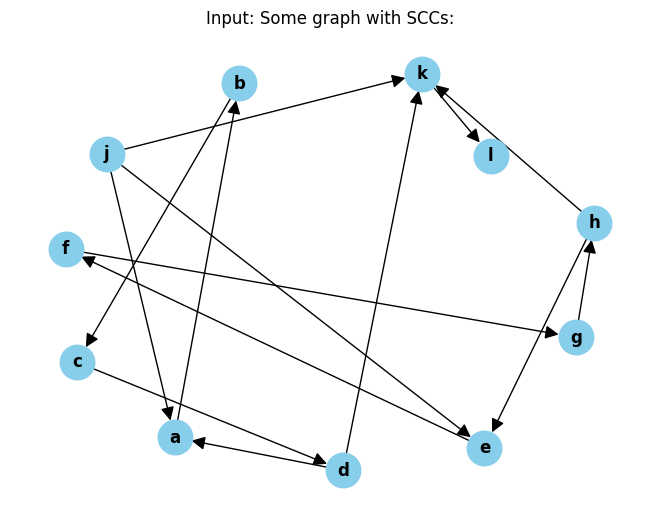

Output:
Non-comparable nodes: True


In [49]:
# Make sure you have ran the dependacies and included the libaries that are at the start of the notebook
def topological_sort(G):
    return list(nx.topological_sort(G))

def find_non_comparable_nodes(DAG):
    topo_order = topological_sort(DAG)
    #print("Topological ordering:")
    #print(topo_order)

    for i in range(len(topo_order) - 1):
        #print(i)
        v = topo_order[i]
        u = topo_order[i + 1]

        if not DAG.has_edge(v, u) and not DAG.has_edge(u, v):
            return True

    return False

def compute_condensation(graph):
    scc = nx.condensation(graph)
    return scc

def find_non_comparable_nodes_digraph(graph):
    #condensed_graph = graph
    condensed_graph = compute_condensation(graph)
    return find_non_comparable_nodes(condensed_graph)


######### Test scenarios #########

#  DAG_1 (Should return False)
DAG_1 = nx.DiGraph()
DAG_1.add_edges_from([('a', 'b'), ('b', 'c'), ('c', 'd'), 
                  ('d', 'e'), ('e', 'f'), ('f','g')])
pos = nx.spring_layout(DAG_1, k=3)
nx.draw(DAG_1, pos, with_labels=True, node_color="skyblue", font_weight="bold", arrowsize=20, node_size=618)
plt.title("Input: DAG_1:")
plt.show()
topological_order = nx.topological_sort(DAG_1)
print(*topological_order)
result = find_non_comparable_nodes_digraph(DAG_1)
print("Output:")
print(f"Non-comparable nodes: {result}")

#  DAG_2 (Should return True)
DAG_2 = nx.DiGraph()
DAG_2.add_edges_from([('a', 'b'), ('a', 'c'), ('c', 'd'), 
                  ('d', 'e'), ('e', 'f'), ('f','g')])
pos = nx.spring_layout(DAG_2, k=3)
nx.draw(DAG_2, pos, with_labels=True, node_color="skyblue", font_weight="bold", arrowsize=20, node_size=618)
plt.title("Input: DAG_2:")
plt.show()
topological_order = nx.topological_sort(DAG_2)
print(*topological_order)
result = find_non_comparable_nodes_digraph(DAG_2)
print("Output:")
print(f"Non-comparable nodes: {result}")

#  Digraph_1 (has cycles) (Should return False)
Digraph_1 = nx.DiGraph()
Digraph_1.add_edges_from([('a', 'b'), ('b', 'c'), ('c', 'd'), 
                  ('d', 'e'), ('e', 'f'), ('f','a')])
pos = nx.spring_layout(Digraph_1, k=3)
nx.draw(Digraph_1, pos, with_labels=True, node_color="skyblue", font_weight="bold", arrowsize=20, node_size=618)
plt.title("Input: Digraph_1:")
plt.show()

result = find_non_comparable_nodes_digraph(Digraph_1)
print("Output:")
print(f"Non-comparable nodes: {result}")

#  Digraph_2 (has cycles) (Should return True)
Digraph_2 = nx.DiGraph()
Digraph_2.add_edges_from([('a', 'b'), ('b', 'c'), ('c', 'd'), 
                  ('d', 'e'), ('e', 'c'), ('a','f'),('e','b')])
pos = nx.spring_layout(Digraph_2, k=3)
nx.draw(Digraph_2, pos, with_labels=True, node_color="skyblue", font_weight="bold", arrowsize=20, node_size=618)
plt.title("Input: Digraph_2:")
plt.show()


result = find_non_comparable_nodes_digraph(Digraph_2)
print("Output:")
print(f"Non-comparable nodes: {result}")\

# Digraph_3 (has SCCs) (Should return True)
Digraph_3 = nx.DiGraph()
Digraph_3.add_edges_from([('a', 'b'), ('b', 'c'), ('c', 'd'), ('d', 'a')])
Digraph_3.add_edges_from([('e', 'f'), ('f', 'g'), ('g', 'h'), ('h', 'e')])
Digraph_3.add_edges_from([('j', 'k'), ('k', 'l')])
Digraph_3.add_edges_from([('j', 'a'), ('j', 'e')])
Digraph_3.add_edges_from([('d', 'k'), ('h', 'k')])
pos = nx.spring_layout(Digraph_3, k=3)
nx.draw(Digraph_3, pos, with_labels=True, node_color="skyblue", font_weight="bold", arrowsize=20, node_size=618)
plt.title("Input: Some graph with SCCs:")
plt.show()

#topological_order = nx.topological_sort(Digraph_2)
#print(*topological_order)
result = find_non_comparable_nodes_digraph(Digraph_3)
print("Output:")
print(f"Non-comparable nodes: {result}")


Sources:

https://en.wikipedia.org/wiki/Strongly_connected_component#Definitions

https://en.wikipedia.org/wiki/Kosaraju%27s_algorithm

https://en.wikipedia.org/wiki/Tarjan%27s_strongly_connected_components_algorithm

https://cs.stackexchange.com/questions/160031/linear-algorithm-to-decide-whether-a-dag-contains-at-least-one-incomparable-pair